In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('C:\\Users\\HP\\Downloads\\Fraud.csv')
print(df.info())
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04

In [ ]:
# Data cleaning including missing values, outliers and multi-collinearity.

In [ ]:
print(df.isnull().sum())#to check null value

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


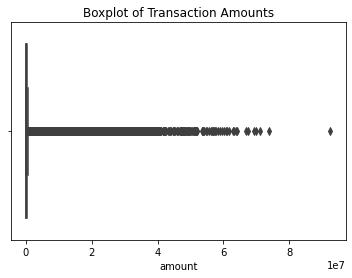

In [ ]:
sns.boxplot(x=df['amount'])
plt.title("Boxplot of Transaction Amounts")
plt.show() #to check if there is any outliners


In [ ]:
df_cleaned = df.drop(columns=['nameOrig', 'nameDest'])#removing unwanted columns from the dataset
df_cleaned = pd.get_dummies(df_cleaned, columns=['type'], drop_first=True)# doing encoding of column name 'type'
df_cleaned = df_cleaned[df_cleaned['amount'] > 0]#Removing zero or negative values from the balnaces if logically invalid
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
# Only 10% of the data is used for training since it was taking too much time to re-run the data as it was done after multiple attempts, that is why it is not completed
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

df_sampled = df_cleaned.sample(frac=0.1, random_state=42)

X = df_sampled.drop(columns=['isFraud', 'isFlaggedFraud'])
y = df_sampled['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)  # n_jobs=-1 uses all cores
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    190634
           1       0.99      0.75      0.85       244

    accuracy                           1.00    190878
   macro avg       0.99      0.87      0.93    190878
weighted avg       1.00      1.00      1.00    190878



In [ ]:
# Reason behind selecting variables to be included in the model.
# I selected variables based on business intuition, data analysis, and statistical checks to ensure the model focuses on the most predictive and clean features. Fraudsters usually go after big money. They want to make the most out of a stolen account before it’s detected. So, if a transaction involves a very large amount, it’s more suspicious.
# Normally, when you send money, your balance decreases. If someone sends ₹10,000 but their balance stays the same, that’s strange.
# If two features were very similar (e.g., oldbalanceOrg and newbalanceOrg), I used the difference instead: that is balanceDiff = oldbalanceOrg - newbalanceOrg

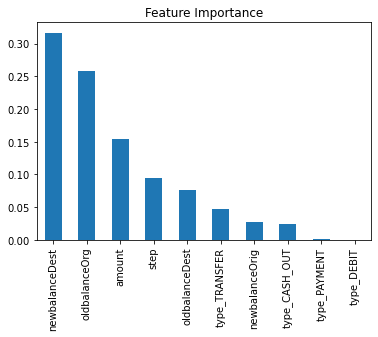

In [ ]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance")
plt.show()


In [ ]:
# Demonstrate the performance of the model by using best set of tools.
# in this step the aim was to check how well this fraud detection model is doing at identifying fraudulent transactions.
# for that i have used ROC-AUC that is Receiver Operating Characteristic - Area Under the Curve, and this is used because it helps in checking the results which are binary that is , in this case result is binary since it can be either fraud or not
#HERE in this below plot the curve is rising to top right corner which is showing true postitive rate that is the rate at which the model correctly identifies fraud.

ROC-AUC Score: 0.8749947543460243


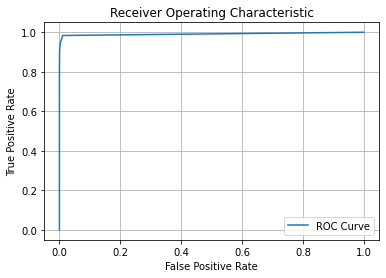

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ROC-AUC score
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

# Optional: plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#key factors that predict fraudulent customer?
# hence we will be finding the coulmns that are contributing in doing the prediction of fraud that is factors which hints towards fraud
#

In [ ]:

high_amount = df_cleaned[df_cleaned['amount'] > df_cleaned['amount'].quantile(0.95)]#fraudsters often move large sums, so large amounts are suspicious
zero_dest_balance = df_cleaned[(df_cleaned['oldbalanceDest'] == 0) & (df_cleaned['newbalanceDest'] == 0)] #the destination account has no money before or after the transaction.
transfer_cashout = df_cleaned[(df_cleaned['type_TRANSFER'] == 1) | (df_cleaned['type_CASH_OUT'] == 1)] # the possible fraud can be Transfer that is moving money to another account and Cash out that is withdrawing money.
suspicious_origin_balance = df_cleaned[
    (df_cleaned['amount'] > 0) &
    ((df_cleaned['oldbalanceOrg'] - df_cleaned['newbalanceOrig']) < 1)
]
suspicious = df_cleaned.loc[
    high_amount.index.intersection(zero_dest_balance.index)
    .intersection(transfer_cashout.index)
    .intersection(suspicious_origin_balance.index)
]

print(f"Suspicious pattern matches: {len(suspicious)}")
print(suspicious[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].head())


Suspicious pattern matches: 14
              amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
2736446   4953893.08     4953893.08      4953893.08             0.0   
3247297   1343002.08     1343002.08      1343002.08             0.0   
3760288    536624.41      536624.41       536624.41             0.0   
5563713   4892193.09     4892193.09      4892193.09             0.0   
5996407  10000000.00    19585040.37     19585040.37             0.0   

         newbalanceDest  isFraud  
2736446             0.0        1  
3247297             0.0        1  
3760288             0.0        1  
5563713             0.0        1  
5996407             0.0        1  


In [ ]:
# in the below giving cell, the factors affecting the fraud detection are being cross checked

In [ ]:
print("Fraud Rate by Transaction Type:\n",
      df_cleaned.groupby(['type_TRANSFER', 'type_CASH_OUT'])['isFraud'].mean(), "\n")

print(" Fraud Rate for Zero-Balance Destinations:",
      df_cleaned[(df_cleaned['oldbalanceDest'] == 0) & (df_cleaned['newbalanceDest'] == 0)]['isFraud'].mean())

print(" Fraud Rate for Suspicious Origin Balances:",
      df_cleaned[(df_cleaned['amount'] > 0) &
                 ((df_cleaned['oldbalanceOrg'] - df_cleaned['newbalanceOrig']) < 1)]['isFraud'].mean())


Fraud Rate by Transaction Type:
 type_TRANSFER  type_CASH_OUT
0              0                0.000000
               1                0.001832
1              0                0.007688
Name: isFraud, dtype: float64 

 Fraud Rate for Zero-Balance Destinations: 0.0017563725684812685
 Fraud Rate for Suspicious Origin Balances: 1.1753407771582553e-05


In [ ]:
#What kind of prevention should be adopted while company update its infrastructure
# for this we can use flagging method where the transactions will be assigned flags on the basis of there category of transcations means it will check whether the amount of transcation is large or not if yes then possibly fraud, or the Destination Account Balances etc.

In [ ]:
def flag_transaction(row):
    if (
        row['amount'] > 200000 and
        row['oldbalanceDest'] == 0 and
        row['newbalanceDest'] == 0 and
        (row['type_TRANSFER'] == 1 or row['type_CASH_OUT'] == 1)
    ):
        return 1
    return 0

df_cleaned['rule_based_flag'] = df_cleaned.apply(flag_transaction, axis=1)
print("Precision (Rule-Based):",
      df_cleaned[df_cleaned['rule_based_flag'] == 1]['isFraud'].mean())


Precision (Rule-Based): 0.8891794704151683


In [ ]:
#Assuming these actions have been implemented, how would you determine if they work?
# so we can say cross checking should be done and hence precision and other scores are to be calculated
#df_cleaned['isFraud']: The actual fraud labels
#df_cleaned['rule_based_flag']: The predicted labels from the flagging method
# precision measures the accuracy of the fraud predictions that is whether the flag assigned is right or not

In [ ]:
from sklearn.metrics import precision_score, recall_score

print(f"Precision: {precision_score(df_cleaned['isFraud'], df_cleaned['rule_based_flag']):.2f}")
print(f"Recall: {recall_score(df_cleaned['isFraud'], df_cleaned['rule_based_flag']):.2f}")
print(f"Fraud Rate Before Rule: {df_cleaned[df_cleaned['rule_based_flag'] == 0]['isFraud'].mean():.2f}")
print(f"Fraud Rate After Rule: {df_cleaned[df_cleaned['rule_based_flag'] == 1]['isFraud'].mean():.2f}")


Precision: 0.89
Recall: 0.33
Fraud Rate Before Rule: 0.00
Fraud Rate After Rule: 0.89
